# Intermediate Network Analysis in Python

Build on your knowledge and skills to tackle more advanced problems in network analytics! Gain the conceptual and practical skills to analyze evolving time series of networks, learn about bipartite graphs, and how to use bipartite graphs in product recommendation systems. You'll also learn about graph projections, why they're so useful in Data Science, and figure out the best ways to store and load graph data from files. You'll consolidate all of this knowledge in a final chapter case study, in which you'll analyze a forum dataset.

## Chapter 1: Bipartite graphs & product recommendation systems
Learn about bipartite graphs and how they are used in recommendation systems. You will explore the GitHub dataset from the previous course, this time analyzing the underlying bipartite graph that was used to create the graph that you used earlier. Finally, you will get a chance to build the basic components of a recommendation system using the GitHub data!

### Defintions & basic recap
* Eric Ma: computation biological engineer from MIT (course instructor)

* **Network** = **Graph** = (nodes/edges)
    * A network, which is also known as a graph, is comprised of two sets: a set of nodes, and a set of edges
    * We often draw graphs as "circles joined by lines," where the circles represent some real world entity, such as individuals in a social network, and the lines denote some relationship between the entities, such as being connected as friends in a social network.
* **Directed** or **Undirected**
    * Facebook: Undirected (no direction is implied in "friendship")
    * Twitter: Directed (directional "Follow")
* **`networkx`**: API for analysis of graphs
    * contains a library of classes and functions for the creation, analysis, and manipulation of graphs
    
* Using `len(G.nodes())` and `len(G.edges())`, we can start describing a graph's basic statistics.
* Graph types include: `Graph`, `DiGraph`, `MultiGraph`, and `MultiDiGraph`

#### Network visualization
* **`nxviz`:** API for creating beautiful and rational graph viz
* **Rational** visualizations prioritize the nodes' placement; examples:
    * matrix
    * arc
    * circos
    * hive
    

In [43]:
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt
from collections import defaultdict

```
ap = nv.ArcPlot(G)
ap.draw()
plt.show()
```

**Add the degree centrality score of each node to their metadata dictionary:**
```
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G)
for n in G.nodes():
    G.nodes[n]['centrality'] = dcs[n]
```

#### Plotting using nxviz

```
# Create the CircosPlot object: c
c = CircosPlot(G, node_color='bipartite', node_grouping='bipartite', node_order='centrality')

# Draw c to the screen
c.draw()

# Display the plot
plt.show()
```

### Bipartite graphs
* There are two conditions for defining a **bipartite graph**:
    * **A graph in which the nodes are partitioned into two sets.**
    * **The nodes in one set cannot be connected to one another; they can only be connected to nodes in the other set.**
* This is in contrast to the **unipartite** graphs we've been using thus far in the course, in which the nodes are not explicitly partitioned into two sets.
* An example where a bipartite graph may come in handy is: modeling the purchases that a set of customers make
    * The nodes are partitioned into two sets: the customers partition, and the products partition
    * Edges denote that a customer has purchased a particular product.
    * Customers cannot purchase other customers, products cannot be purchased by other products.

In [2]:
# import networks as nx
G= nx.Graph()
numbers = range(3)
G.add_nodes_from(numbers, bipartite='customers')
letters = ['a', 'b']
G.add_nodes_from(letters, bipartite='products')

* Though it is not required by the API, by convention, bipartite information is encoded as part of the node attributes (or metadata), using the `bipartite` keyword.
* In the toy example above, let's say we're modeling the connectivity between a 'customers' and a 'products' partition.
* In constructing the graph, we use the graph object's method `add_nodes_from()`, passing in the list of nodes from each partition as the first argument
* By passing in the `bipartite='customers'` or `bipartite='products'` arguments, the method will automatically create the node's metadata dictionary with the key bipartite and the value product or customers. 

In [3]:
G.nodes(data=True)

NodeDataView({0: {'bipartite': 'customers'}, 1: {'bipartite': 'customers'}, 2: {'bipartite': 'customers'}, 'a': {'bipartite': 'products'}, 'b': {'bipartite': 'products'}})

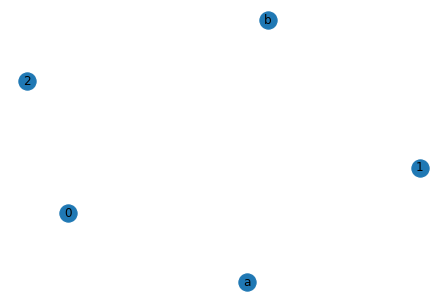

In [4]:
nx.draw(G, with_labels =True)
plt.show()

In [5]:
G.add_edge(0, 'b')
G.add_edge(1, 'b')
G.add_edge(2, 'a')
G.add_edge(2, 'b')

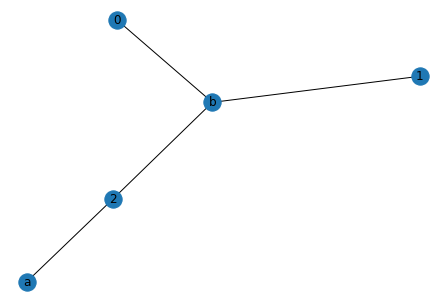

In [6]:
nx.draw(G, with_labels =True)
plt.show()

* **Note:** the partition info stored and displayed in metadata above.

#### Degree Centrality
* **Recall** that the degree centrality metric is a measure of node importance.
* For any graph, the degree centrality of a node in the graph is defined as the number of neighbors in the graph divided by the number of possible neighbors it could have
    * **(number of neighbors) // (number of possible neighbors)**
    
* **Number of possible neighbors *depends on graph type***
    * In a **bipartite** graph, the denominator is the number of nodes present in the *other* partition.


#### Filtering graphs
* Because NetworkX doesn't provide an explicit 'bipartite' graph class, you will need to learn how to filter a graph for the node set.
* This is most commonly accomplisheed by using list comprehensions
* For example, to get the nodes in the `'customers'` partition, use the list comprehension below:

In [7]:
cust_nodes = [n for n, d in G.nodes(data=True) if d['bipartite']=='customers']

In [8]:
cust_nodes

[0, 1, 2]

* Note how there's only `'customer'` nodes contained in the above list. 
* Upcoming in the course: we can get the bipartite degree centrality of a graph by calling on the bipartite degree centrality function, which requires a graph G and a list of nodes from one partition as arguments (it can be either partition.

In [9]:
nx.bipartite.degree_centrality(G, cust_nodes)

{0: 0.5, 1: 0.5, 2: 1.0, 'b': 1.0, 'a': 0.3333333333333333}

#### The 'bipartite' keyword
* This keyword is part of a node's metadata dictionary, and can be assigned both when you add a node and after the node is added. 
* Write a function that returns the nodes from a given partition in a bipartite graph.

In [10]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.nodes[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

```
# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))
```

#### Degree centrality distribution of user nodes
* The "degree centrality" is a measure of node importance 
* The "degree centrality distribution" is the list of degree centrality scores for all nodes in the graph. 

```
# Import matplotlib
import matplotlib.pyplot as plt

# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()

# Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(G, 'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for project_nodes: project_dcs
project_dcs = [dcs[n] for n in project_nodes]

# Plot the degree distribution of project_dcs
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show()
```

### Bipartite graphs and recommendation systems
#### Recommendation systems
* Previously: Recommended users to connect with one another
    * Graph: 'unipartite' (or, users-only) version
* Now: 'bipartite' (or, repo-users) version
* Recommending repositories for users to work on (which is an alternative to recommending users to work with). 
    * The concept is founded on **set overlaps** between highly similar nodes on one partition.

In [ ]:
#G = G.remove_nodes_from(list(G.nodes()))

In [ ]:
#G = nx.Graph.remove_edges_from(list(G.edges()))

In [ ]:
#G.remove_node('a')

In [ ]:
#G=G.remove_node(2)

In [11]:
# import networks as nx
G2= nx.Graph()
users = ['user1', 'user2', 'user3']
G2.add_nodes_from(users, bipartite='users')
repos = ['repo1', 'repo2', 'repo3']
G2.add_nodes_from(repos, bipartite='repos')
G2.add_edge('user1', 'repo2')
G2.add_edge('user2', 'repo2')
G2.add_edge('user3', 'repo1')
G2.add_edge('user3', 'repo2')

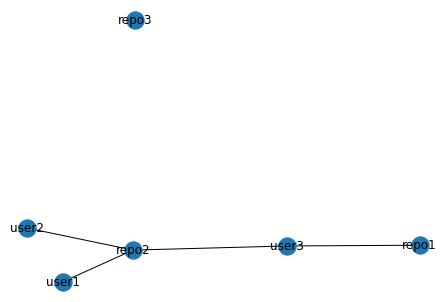

In [12]:
nx.draw(G2, with_labels = True)
plt.show()

* `user1` is connected to `repo2` and we want to recommend repositories that `user1` might be interested in working on.
* Which other users are connected to `repo2` (other than `user1`), which in this case are `user2` and `user3`
* Both `user2` and `user3` are also connected, but in this case, `user3` also has another repository, `repo1`, that it's connected to.
* In this case, we may want to thus recommend `repo1` to `user1` to contribute to.
* One thing that may come in handy for the following exercise is the idea of using **set operations** in your code.

#### Code: Node sets

In [14]:
G2.nodes(data=True)

NodeDataView({'user1': {'bipartite': 'users'}, 'user2': {'bipartite': 'users'}, 'user3': {'bipartite': 'users'}, 'repo1': {'bipartite': 'repos'}, 'repo2': {'bipartite': 'repos'}, 'repo3': {'bipartite': 'repos'}})

In [16]:
G2.edges(data=True)

EdgeDataView([('user1', 'repo2', {}), ('user2', 'repo2', {}), ('user3', 'repo1', {}), ('user3', 'repo2', {})])

* Note that the node list contains all 6 nodes, belonging to both the repositories and useres partitions, and the edge list containing the 4 edges between them.
* Suppose we wanted to see which neighbors are shared between two nodes, `user1` and `user3`

In [36]:
user1_nbrs = G2.neighbors('user1')
user1_nbrs

In [18]:
#list(user1_nbrs)

['repo2']

In [37]:
user3_nbrs = G2.neighbors('user3')
user3_nbrs

In [21]:
#list(user3_nbrs)

['repo1', 'repo2']

* To see which neighbors are shared, we can use `set` and `.intersection()`

In [32]:
set(user1_nbrs).intersection(user3_nbrs)

{'repo2'}

* Call the `intersection()` method, passing in the other container nodes, to get the common elements
* Here, the intersection of user 1 and user 3 neighbors is `repo2`; **they both contributed to `repo2`.**
* We can also get the difference between the two, which is the nodes that are in the left node set that are not in the right node set. In this case, a repo that `user3` contributed to that `user1` didn't contribute to is `repo1`
* As such, this is one candidate repository that could be recommended to `user1`

In [38]:
set(user3_nbrs).difference(user1_nbrs)

{'repo1'}

### Shared nodes in other partition
* In order to build up your concept of recommendation systems, we are going to start with the fundamentals. The focus here is on computing user similarity in bipartite graphs.
* Your job is to write a function that takes in two nodes, and returns the set of repository nodes that are shared between the two user nodes.

In [39]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.nodes[node1]['bipartite'] == G.nodes[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

```
# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G, 'u7909', 'u2148')))
```

### User similarity metric
Having written a function to calculate the set of nodes that are shared between two nodes, you're now going to write a function to compute a metric of similarity between two users: the number of projects shared between two users divided by the total number of nodes in the other partition. This can then be used to find users that are similar to one another.

In [42]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.nodes[user1]['bipartite'] == 'users'
    assert G.nodes[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

```
# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G, 'u4560', 'u1880', 'projects')

print(similarity_score)
```

### Find similar users
You're now going to build upon what you've learned so far to write a function called most_similar_users() that finds the users most similar to another given user.

A list of nodes, `user_nodes` has been created, which contains all of the users except the given user that has been passed into the function. Your task is to complete the function such that it finds the users most similar to this given user. You'll make use of your `user_similarity()` function from the previous exercise to help do this.

A dictionary called `similarities` has been setup, in which the keys are the scores and the list of values are the nodes.

In [47]:
# from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.nodes[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

```
user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

print(most_similar_users(G, 'u4560', user_nodes, project_nodes))
```

### Recommend repositories
Here, the task is to practice using set differences, and you'll apply it to recommending repositories from a second user that the first user should contribute to.

In [48]:
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

```
# Print the repositories to be recommended
print(recommend_repositories(G, 'u7909', 'u2148'))
```